# Healthcare_Analysis_Project_Capstone3

In [ ]:
# We are doing the project on heart Disease survey . I this we have done some analysis in MySql now we are importing file from SQL the do some 
#EDA after that we train the module & check the accurancy of model 

In [40]:
# Importing the required all Libraries -

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error ,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from math import sqrt

In [5]:
# COnnecting the My Sql Server - 
conn = pymysql.connect(host='localhost',port=int(3306),user='root',passwd='Chinu@123',db='Health_project')
print('Connection Established',conn)

Connection Established <pymysql.connections.Connection object at 0x0000028863753FD0>


In [6]:
# importing data from Mysql data - 
data = pd.read_sql_query('Select *from Heart_csv',conn)
data.head(2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9120\1346425370.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('Select *from Heart_csv',conn)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39


In [7]:
# copying the 
df = data.copy()
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30-39


In [9]:
## Data Reading Basic Steps :-
## Data Reading Basic Steps :-
print('Min Age Group- ',df['age_group'].min())
print('Max Age Group- ',df['age_group'].max())
print('no of columns - \n' , df.columns)
print('no of shapes - ' , df.shape)
print('no of lenght - ' , len(df))
print('no of datatype - \n' , df.dtypes)

Min Age Group-  30-39
Max Age Group-  Under 30
no of columns - 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group'],
      dtype='object')
no of shapes -  (303, 15)
no of lenght -  303
no of datatype - 
 age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
target         int64
age_group     object
dtype: object


In [10]:
print('DataSet Information -\n',df.describe())

DataSet Information -
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std 

In [11]:
# Checking the null missing value - 
print ("The Mising Report - \n",df.isnull().sum())

The Mising Report - 
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64


-0.791335191480832


C:\Users\DELL\AppData\Local\Temp\ipykernel_9120\2323861018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = df['sex'])
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


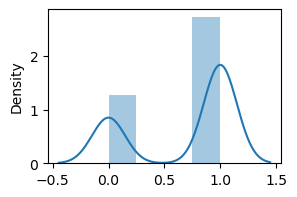

In [14]:
plt.figure(figsize=(3,2))
sns.distplot( x = df['sex'])
print (df['sex'].skew())

In [67]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1


In [104]:
## Now we sta## Now we starting the training & Testing for data - 
X = df.drop(['target'],axis = 1)
y =df['target']  


In [105]:
X.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,0,0,1


In [106]:
y.head(1)

0    1
Name: target, dtype: int64

In [108]:
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.25,random_state=10)

In [127]:
X_train.shape , y_train.shape

((242, 12), (242,))

In [128]:
X_test.shape , y_test.shape

((61, 12), (61,))

In [129]:
### Modeling of Data
model =LinearRegression()
model

LinearRegression()

In [130]:
model_train = model.fit(X_train , y_train)
print('Model Training is completed')

Model Training is completed


In [114]:
y_pred = model.predict(X_test)

In [131]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.11059344262295083
R² Score: 0.5565536637931034


In [132]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(y_pred)

[0.03 0.57 0.44 0.18 0.82 0.79 0.67 0.06 0.02 0.38 0.84 0.34 0.91 0.3
 0.93 0.97 1.   0.03 0.05 0.   0.53 0.1  0.86 0.74 0.48 0.53 0.8  0.66
 0.08 0.93 0.01 0.07 0.   0.65 0.83 0.09 0.94 0.76 0.52 0.95 0.84 0.74
 0.92 0.91 0.57 0.16 0.53 0.99 0.11 0.   0.1  0.12 0.71 0.7  0.1  0.15
 0.55 1.   0.2  0.   0.28]


In [97]:
from sklearn.neighbors import KNeighborsRegressor

In [133]:
model = KNeighborsRegressor(n_neighbors=1)
model

KNeighborsRegressor(n_neighbors=1)

In [134]:
from sklearn.metrics import r2_score,mean_absolute_error
pred = model_train.predict(X_test)
pred

array([ 0.12619652,  0.53017844,  0.7174347 ,  0.03085044,  0.93758139,
        0.91319125,  0.47826754, -0.24530319, -0.05130312,  0.38727093,
        0.63324167,  0.31951851,  0.81943772,  0.13759542,  1.12113755,
        0.88755363,  1.14511441,  0.20210569, -0.18300506,  0.10081334,
        0.54291113, -0.11470984,  0.31873752,  0.66018253,  0.83004632,
        0.57681885,  0.7665926 ,  0.50509226, -0.16774322,  0.90588329,
       -0.06030953,  0.1387381 , -0.1778367 ,  0.35894951,  0.71206167,
        0.19067543,  0.7647769 ,  0.75220403,  0.72484316,  0.75300716,
        0.42547597,  0.60407984,  0.75875897,  0.7303608 ,  0.71717228,
       -0.31426499,  0.67825972,  0.92735611,  0.32171227, -0.0854966 ,
        0.10579349, -0.28024394,  0.70609505,  1.02052106,  0.2901403 ,
       -0.04454961,  0.11789943,  0.92825687,  0.13177161, -0.17607839,
        0.22131794])

In [135]:
model_train.score(X_train , y_train)

0.4967926212662479

In [136]:
r2_score(y_test,pred)

0.5226147110665413

In [137]:
error = []
k = []
for i in range (1,10):
    print('When K = ',i)
    model = KNeighborsRegressor(n_neighbors=i)
    model_train = model.fit(X_train ,y_train)
    print('The Model Training in Completed')
    err = round(1- model_train.score ( X_train , y_train),2)
    error.append(err)
    k.append(i)

When K =  1
The Model Training in Completed
When K =  2
The Model Training in Completed
When K =  3
The Model Training in Completed
When K =  4
The Model Training in Completed
When K =  5
The Model Training in Completed
When K =  6
The Model Training in Completed
When K =  7
The Model Training in Completed
When K =  8
The Model Training in Completed
When K =  9
The Model Training in Completed


In [138]:
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.11905765872890342
